<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/PyTorch_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture

## ÏòàÏ†ú: ÏàòÏãù

In [ ]:
import torch

In [ ]:
# torch.tensor(
#     data: Any,
#     dtype: _dtype | None = None,
#     device: DeviceLikeType | None = None,
#           device is one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl,
#           ideep, hip, ve, fpga, ort, xla, lazy, vulkan, mps, meta, hpu, mtia,
#           privateuseone device type at start of device string
#     requires_grad: _bool = False,
#     pin_memory: _bool = False
# ) -> Tensor
x = torch.tensor(3.5, requires_grad=True)
x

tensor(3.5000, requires_grad=True)

In [ ]:
y = (x - 1) * (x - 2) * (x - 3)
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [ ]:
# def backward(gradient=None, retain_graph=None, create_graph=False, inputs=None)

# Computes the gradient of current tensor wrt(with respect to:~Ïóê Í¥ÄÌïòÏó¨) graph leaves.
# Ïù¥Îäî ÌòÑÏû¨ ÌÖêÏÑúÏùò Í∑∏ÎûòÌîÑ ÏÉÅÏóêÏÑú Í∏∞Ïö∏Í∏∞(gradient)Î•º Í≥ÑÏÇ∞Ìï† Îïå, Ìï¥Îãπ Í∑∏ÎûòÌîÑÏùò ÎßêÎã®Ïóê ÏûàÎäî ÎÖ∏ÎìúÎì§Ïóê ÎåÄÌïú Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
# Ï¶â, Í∑∏ÎûòÌîÑÏùò ÏûÖÎ†•Í≥º Í¥ÄÎ†®Îêú Î∂ÄÎ∂ÑÏóê ÎåÄÌïú Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ≤å Îê©ÎãàÎã§.
# The graph is differentiated using the chain rule.
# If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient,
# the function additionally requires specifying gradient.
# It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. self.
# This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it.
# See Default gradient layouts<default-grad-layouts> for details on the memory layout of accumulated gradients.

# @Args:
#     gradient (Tensor or None): Gradient w.r.t. the tensor.
#           If it is a tensor, it will be automatically converted to a Tensor that does not require grad unless create_graph is True.
#           None values can be specified for scalar Tensors or ones that don't require grad.
#           If a None value would be acceptable then this argument is optional.
#     retain_graph (bool, optional): If False, the graph used to compute the grads will be freed.
#           Note that in nearly all cases setting this option to True is not needed and often can be worked around in a much more efficient way.
#           Defaults to the value of create_graph.
#     create_graph (bool, optional): If True, graph of the derivative will be constructed,
#           allowing to compute higher order derivative products. Defaults to False.
#     inputs (sequence of Tensor): Inputs w.r.t. which the gradient will be accumulated into .grad.
#           All other Tensors will be ignored.
#           If not provided, the gradient is accumulated into all the leaf Tensors that were used to compute the attr::tensors.
y.backward()

In [ ]:
x.grad

tensor(5.7500)

In [ ]:
a = torch.tensor(2.0, requires_grad=True) # a=2
b = torch.tensor(1.0, requires_grad=True) # b=1

x = 2*a + 3*b
y = 5*a**2 + 3*b**3
z = 2*x + 3*y #--> z = 15a¬≤ + 4a + 9b¬≥ + 6b

z.backward()
z

tensor(83., grad_fn=<AddBackward0>)

In [ ]:
# dz/da = 30a + 4
# dz/db = 27b¬≤ + 6

a.grad, b.grad

(tensor(64.), tensor(33.))

In [ ]:
a = torch.tensor(2.0, requires_grad=True) # a=2
b = torch.tensor(1.0, requires_grad=True) # b=1

x = 2*a + 3*b
y = 5*a**2 + 3*b**3
z = 2*x + 3*y

z.backward(create_graph=True)
z

tensor(83., grad_fn=<AddBackward0>)

In [ ]:
a.grad, b.grad

(tensor(64., grad_fn=<CopyBackwards>), tensor(33., grad_fn=<CopyBackwards>))

## ÏòàÏ†ú: Î≥¥Ïä§ÌÑ¥ ÏßëÍ∞í ÏòàÏ∏° - ÏÑ†ÌòïÌöåÍ∑Ä

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn #--> Neural Net
import torch.nn.functional as F #--> NNÏóêÏÑú ÎßéÏù¥ Ïì∞Ïù¥Îäî Ìï®ÏàòÎì§
import torch.optim as optim #--> ÏµúÏ†ÅÌôîÏôÄ Í¥ÄÎ†®Îêú Ìï®ÏàòÎì§

torch.manual_seed(127)
torch.__version__

'2.2.1+cu121'

In [ ]:
url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/boston.csv'
boston = pd.read_csv(url)

boston.rename(columns={"MEDV": "TARGET"}, inplace=True) # MEDV --> TARGET
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  TARGET  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [ ]:
# ÌïôÏäµÏóê ÌïÑÏöîÌïú ÌäπÏÑ± ÏÑ†ÌÉù ÌõÑ torchÍ∞Ä ÌïôÏäµÌï† Ïàò ÏûàÎäî ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôò

cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']

data = torch.from_numpy(boston[cols].values).float() #--> ‚≠ê ÌÜ†ÏπòÏùò ÏûêÎ£åÌòï ÏäµÍ¥Ä~!!
data.shape

torch.Size([506, 6])

|col|content|
|---|---|
|MEDV | Median value of owner-occupied homes in \$1000's |
|INDUS | proportion of non-retail business acres per town |
|RM | average number of rooms per dwelling |
|LSTAT | % lower status of the population |
|NOX | nitric oxides concentration (parts per 10 million) |
|DIS | weighted distances to five Boston employment centres |

In [ ]:
data[:3,:], type(data)

(tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
         [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
         [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671]]),
 torch.Tensor)

In [ ]:
# ÌäπÏÑ±Í≥º ÎùºÎ≤® Î∂ÑÎ¶¨

y = data[:, :1]
X = data[:, 1:]

X.shape, y.shape

(torch.Size([506, 5]), torch.Size([506, 1]))

In [ ]:
# Î™®Îç∏ ÏàòÎ¶Ω
# torch.nn.Linear() --> Applies a linear transformation to the incoming data: y = x¬∑A^T + b
# def __init__(in_features: int, out_features: int, bias: bool=True, device=None, dtype=None) -> None

model = nn.Linear(X.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [ ]:
# model.parameters() --> 'generator' object
next(iter(model.parameters()))

Parameter containing:
tensor([[ 0.1002, -0.4458, -0.0607,  0.0802, -0.1586]], requires_grad=True)

In [ ]:
for p in model.parameters():
    print(p, p.shape, type(p), sep=' / ')

Parameter containing:
tensor([[ 0.1002, -0.4458, -0.0607,  0.0802, -0.1586]], requires_grad=True) / torch.Size([1, 5]) / <class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.2359], requires_grad=True) / torch.Size([1]) / <class 'torch.nn.parameter.Parameter'>


In [ ]:
# Define configurations - hyperparamerters

n_epochs = 3000
learning_rate = 1e-5 #--> 0.00001
print_interval = 1000 #--> 1000Î≤àÏß∏ epoch ÎßàÎã§ ÏÉÅÌô© Ï∂úÎ†•

In [ ]:
# ÌïôÏäµ

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for i in range(n_epochs):
    y_hat = model(X) #--> y(506,1) = x(506,5)¬∑W^T(5,1) + b(1,)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1, loss))
#--> 1000 epoch Ïù¥ÌõÑ loss Í∞íÏù¥ Î≥ÄÌïòÏßÄ X

Epoch 1000: loss=2.8946e+01
Epoch 2000: loss=2.8946e+01
Epoch 3000: loss=2.8946e+01


In [ ]:
tmp = torch.cat([y, y_hat], dim=1) #--> return type: torch.Tensor
tmp.shape, tmp[:3,:]

(torch.Size([506, 2]),
 tensor([[24.0000, 30.2983],
         [21.6000, 25.3205],
         [34.7000, 32.5631]], grad_fn=<SliceBackward0>))

In [ ]:
torch.cat([y, y_hat], dim=1).detach_().numpy()[:3,:] #--> return type: numpy.ndarray

array([[24.      , 30.298332],
       [21.6     , 25.320484],
       [34.7     , 32.5631  ]], dtype=float32)

In [ ]:
# ÌïôÏäµ Í≤∞Í≥º Ï†ïÎ¶¨

df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
df

y      y_hat
0    24.000000  30.298332
1    21.600000  25.320484
2    34.700001  32.563099
3    33.400002  32.396145
4    36.200001  31.764915
..         ...        ...
501  22.400000  26.787899
502  20.600000  24.709869
503  23.900000  31.533836
504  22.000000  29.873182
505  11.900000  24.783981

[506 rows x 2 columns]

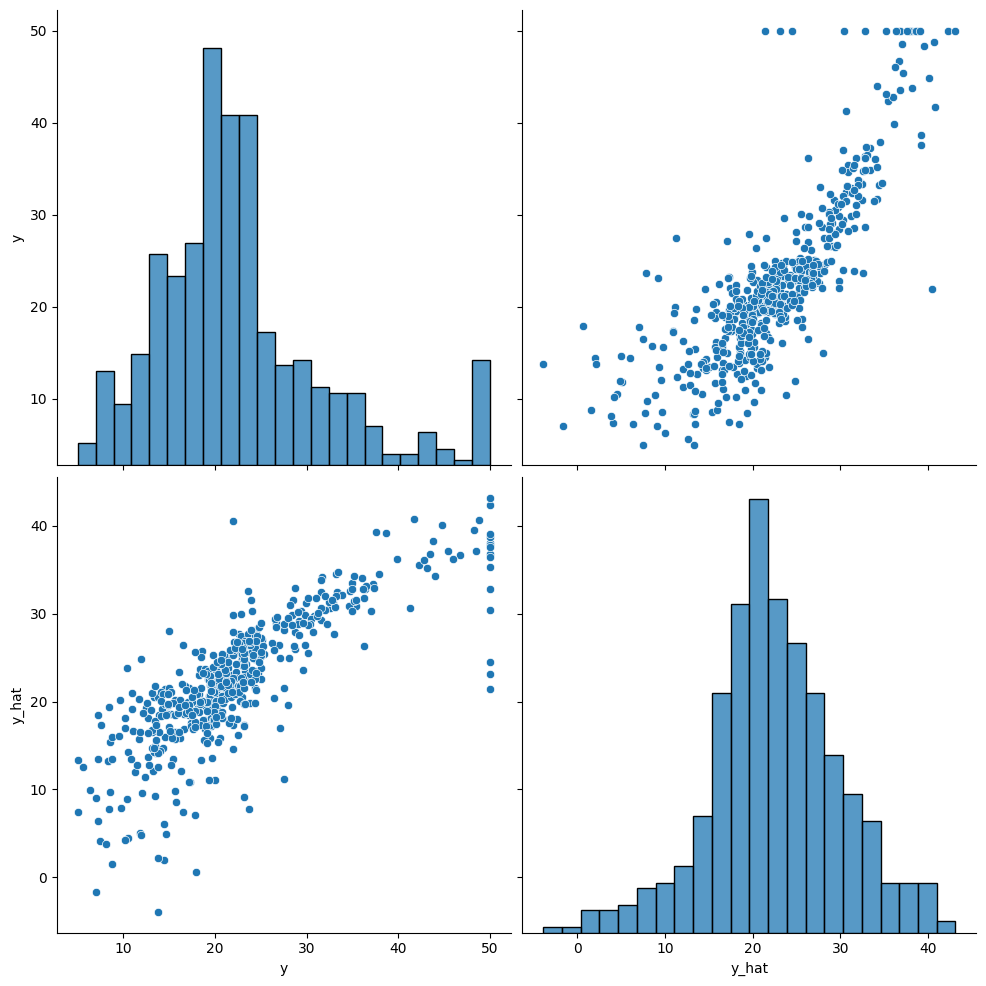

In [ ]:
# Ï∞∏Í∞í yÏùò Î∂ÑÌè¨ & ÏòàÏ∏°Í∞í y_hatÏùò Î∂ÑÌè¨
sns.pairplot(df, height=5)
plt.show()

## ÏòàÏ†ú: Ïú†Î∞©Ïïî ÏßÑÎã® ÏòàÏ∏° - Ïù¥ÏßÑÎ∂ÑÎ•ò

In [ ]:
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()
bcancel_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
bcancel_df['class'] = b_cancer.target
bcancel_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  class  
0                  0.2654          0.4601                  0.11890      0  
1                  0.1860          0.2750                  0.08902      0  
2                  0.2430          0.3613                  0.08758      0  
3                  0.2575          0.6638                  0.17300      0  
4                  0.1625          0.2364                  0.07678   

In [ ]:
# Í¥ÄÏã¨ÏûàÎäî Ïª¨Îüº Ï†ïÎ¶¨ & ÌôïÏù∏
cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concave points',
        'worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points',
        'class']
data = torch.from_numpy(bcancel_df[cols].values).float()
data.shape

torch.Size([569, 11])

In [ ]:
# Îç∞Ïù¥ÌÑ∞Î•º ÌäπÏÑ±Í≥º ÎùºÎ≤®Î°ú Î∂ÑÎ¶¨

X = data[:, :-1]
y = data[:, -1:]

X.shape, y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [ ]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__() #--> ÏÉÅÏÜçÌïòÎäî nn.ModuleÏùò Ï¥àÍ∏∞Ìôî Ìï®Ïàò Ìò∏Ï∂úÌï®ÏúºÎ°úÏç® ModuleÏùò ÏÜçÏÑ±ÏùÑ ÏÉÅÏÜçÎ∞õÎäîÎã§.

        self.linear = nn.Linear(input_dim, output_dim)
        self.act_func = nn.Sigmoid() #--> 2ÏßÑ Î∂ÑÎ•òÏù¥ÎØÄÎ°ú Ï∂úÎ†•Îã®ÏùÄ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò

    def forward(self, x):
        # |x| = (batch_size, input_dim)
        # |y| = (batch_size, output_dim)
        y = self.act_func(self.linear(x))

        return y

In [ ]:
model = MyModel(input_dim=X.size(-1), output_dim=y.size(-1))
model

MyModel(
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (act_func): Sigmoid()
)

In [ ]:
# Define configurations - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

n_epochs = 200000
learning_rate = 1e-3
print_interval = 50000

In [ ]:
# ÌïôÏäµ

# Define BCELoss(Binary Cross Entropy) instead of MSELoss
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for i in range(n_epochs):
    y_hat = model(X)
    loss = criterion(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1, loss))

Epoch 50000: loss=1.1487e-01
Epoch 100000: loss=1.1449e-01
Epoch 150000: loss=1.1412e-01
Epoch 200000: loss=1.1375e-01


| epochs | lr=0.01 | lr=0.001 |
|:---:|:---:|:---:|
|  50000 | loss=0.16690 | loss=0.11487 |
| 100000 | loss=0.13522 | loss=0.11449 |
| 150000 | loss=0.12247 | loss=0.11412 |
| 200000 | loss=0.11547 | loss=0.11375 |
| Accuracy | 0.9631 | 0.9649 |

In [ ]:
y.shape, y.size(dim=0), y.size(dim=-1)

(torch.Size([569, 1]), 569, 1)

In [ ]:
# Accuracy Í≥ÑÏÇ∞

correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt/total_cnt))

Accuracy: 0.9649


## ÏòàÏ†ú: MNIST - CNN LeNET

- PyTorchÎ•º Ïù¥Ïö©Ìïú MNIST Data Î∂ÑÎ•ò(Classification)

In [ ]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F # DLÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî ÏàòÌïôÏ†Å Ìï®ÏàòÎì§
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

import matplotlib.pyplot as plt

In [ ]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else "cpu")
print('Current device is', device)

Current device is cuda


### - dataset

In [ ]:
# MNIST Data Î∂àÎü¨Ïò§Í∏∞

# data Ï†ÑÏ≤òÎ¶¨ ÏÑ§Ï†ïÏúºÎ°ú Î∞îÎ°ú tensorÎ°ú Î≥ÄÌòï
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

print('number of train data:', len(train_data))
print('number of test data:', len(test_data))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:01<00:00, 6015998.48it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 156666.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:01<00:00, 1498385.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 3689103.17it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of train data: 60000
number of test data: 10000


In [ ]:
train_data, type(train_data)

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 torchvision.datasets.mnist.MNIST)

In [ ]:
train_data[0] #--> 'tuple' object: (image, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
train_data[0][0].shape #--> image data

torch.Size([1, 28, 28])

In [ ]:
train_data[0][1] #--> label

5

In [ ]:
# kerasÎäî Ï±ÑÎÑêÏùò Ï∞®ÏõêÏù¥ shapeÏùò Îß® ÎßàÏßÄÎßâÏóê Ïò®Îã§. [28, 28, 1]
# torchÎäî Ï±ÑÎÑêÏùò Ï∞®ÏõêÏù¥ shape Ï≤´Î≤àÏß∏Ïóê Ï°¥Ïû¨ÌïúÎã§. [1, 28, 28]
# squeeze()Îäî Ï∞®Ïõê(dimension)Ïù¥ 1Ïù∏ Í≤ÉÏùÑ ÏóÜÏï†Îäî Ìï®ÏàòÏù¥Îã§.

train_data[0][0].squeeze().shape

torch.Size([28, 28])

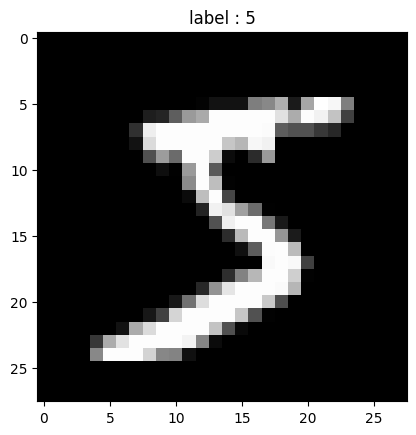

In [ ]:
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [ ]:
# hyperparameter ÏÑ§Ï†ï

batch_size = 50 #--> Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïúÎ≤àÏóê Î™®ÏïÑÏÑú Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏Í∞Ä
epochs = 20
learning_rate = 0.0001

> PyTorchÏóêÏÑú DataLoader ÎßåÎì§Í∏∞ - `torch.utils.data.DataLoader` ÏÇ¨Ïö©

- `torch.utils.data.DataLoader`Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏïÑÎûò Îëê Í∞ÄÏßÄ Ïù∏ÏàòÎ•º Î∞õÎäîÎã§.

    1. `torch.utils.data.dataset.Dataset` : data generator

    2. batch_size

- `torch.utils.data.DataLoader`Ïùò Í∏∞Îä•ÏùÄ generatorÏóêÏÑú batch_size ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùÑ ÏñªÎäî Í≤ÉÏù¥Îã§.

    ```python
    train_loader = torch.utils.data.DataLoader(
        dataset=datasets.MNIST(root='dataset/', download=True, train=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,)) #--> (img - mean) / std
                            ])),
        batch_size=batch_size,
        shuffle=True)
        
    test_loader = torch.utils.data.DataLoader(
        dataset=datasets.MNIST(root='dataset', train=False,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.,), (1.))
                            ])),
        batch_size=test_batch_size,
        shuffle=True)
    ```

In [ ]:
# mini batch Íµ¨ÏÑ± ÏÑ§Ï†ï

# shuffleÏùò ÏùòÎØ∏Îäî Îç∞Ïù¥ÌÑ∞Ïùò ÏàúÏÑúÎ•º ÌïôÏäµÌïòÏßÄ Î™ªÌïòÍ≤å ÌïòÎäî Í≤ÉÏù¥Îã§.
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [ ]:
# Ï≤´Î≤àÏß∏ Î¨∂Ïùå(batch)Î•º Í∞ÄÏ†∏ÏôÄ ÌôïÏù∏
first_batch = train_loader.__iter__().__next__()
type(first_batch), len(first_batch), first_batch #--> list, 2, ~

(list,
 2,
 [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [

In [ ]:
image, label = first_batch

print('{:15s} | {:<25s} | {}'.format('name', 'type', 'size'))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(image)), image.shape)) #--> pixel data
print('{:15s} | {:<25s} | {}'.format('first_batch[1]', str(type(label)), label.shape)) #--> target

name            | type                      | size
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


### - model

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500) # in_features, out_features
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)
```

In [ ]:
# nn.Conv2d(
#     in_channels: int, out_channels: int, kernel_size: _size_2_t, stride: _size_2_t = 1, padding: _size_2_t | str = 0,
#     dilation: _size_2_t = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros',
#     device: Any | None = None, dtype: Any | None = None
# ) -> None

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # in_channels: int, out_channels: int, kernel_size: _size_2_t(3x3), stride: _size_2_t = 1
        # padding='same' --> convolutional filterÏóê ÏùòÌï¥ Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÍ∞Ä Ï§ÑÏñ¥ÎìúÎäî Í≤ÉÏùÑ Î∞©ÏßÄ, how? ÌÖåÎëêÎ¶¨Ïóê 0ÏùÑ Ï±ÑÏõåÏÑú
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding='same')
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding='same')
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(3136, 1000) #--> 7 x 7 x 64 = 3136
        self.fc2 = nn.Linear(1000, 10) # in_features: int, out_features: int

    def forward(self, x): #--> 28 x 28
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2) #--> 14 x 14

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2) #--> 7 x 7

        x = self.dropout(x)
        x = torch.flatten(input=x, start_dim=1) #--> 7 x 7 x 64, Ï∞®Ïõê Î≥ÄÌôòÎßå ÏãúÎèÑ
        x = self.fc1(x) #<-- 7 x 7 x 64
        x = F.relu(x)
        x = self.fc2(x)

        output = F.log_softmax(input=x, dim=1)

        return output

In [ ]:
model = CNN().to(device)
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (dropout): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
model.conv1.weight.shape, model.conv1.bias.shape

(torch.Size([32, 1, 3, 3]), torch.Size([32]))

In [ ]:
model.conv2.weight.shape, model.conv2.bias.shape

(torch.Size([64, 32, 3, 3]), torch.Size([64]))

In [ ]:
model.fc1.weight.shape, model.fc1.bias.shape

(torch.Size([1000, 3136]), torch.Size([1000]))

In [ ]:
model.fc2.weight.shape, model.fc2.bias.shape

(torch.Size([10, 1000]), torch.Size([10]))

In [ ]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 14, 14]          18,496
         Dropout2d-3             [-1, 64, 7, 7]               0
            Linear-4                 [-1, 1000]       3,137,000
            Linear-5                   [-1, 10]          10,010
Total params: 3,165,826
Trainable params: 3,165,826
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 12.08
Estimated Total Size (MB): 12.40
----------------------------------------------------------------


In [ ]:
# Î™®Îç∏ ÌïôÏäµ

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

i = 1
model.train() #--> Î™®Îç∏ ÌïôÏäµ ÏÑ†Ïñ∏ (Ïã§Ï†ú ÌïôÏäµ X), modelÏùÑ train Î™®ÎìúÎ°ú Î∞îÍæºÎã§.
for epoch in range(epochs):
    start_time_each_epoch = time.time()

    for data, target in train_loader:
        # print(data.shape) #--> dataÏóêÎäî batchÎ°ú Î¨∂ÏùÄ 50Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥Îã§.
        data = data.to(device) #--> x
        target = target.to(device) #--> y

        output = model(data) #--> y_hat

        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward() #--> Weight Ïó≠Ï†ÑÌåå
        optimizer.step() #--> Wehght Update

        if i % 1000 == 0:
            print("time: {:.2f}s".format(time.time() - start_time_each_epoch))
            print("Train Step: {:>5d}  |  Loss: {:.4f}".format(i, loss.item()))
        i += 1

time: 8.54s
Train Step:  1000  |  Loss: 0.1117
time: 5.53s
Train Step:  2000  |  Loss: 0.1022
time: 5.36s
Train Step:  3000  |  Loss: 0.0717
time: 2.81s
Train Step:  4000  |  Loss: 0.0759
time: 1.38s
Train Step:  5000  |  Loss: 0.0462
time: 8.93s
Train Step:  6000  |  Loss: 0.0107
time: 7.41s
Train Step:  7000  |  Loss: 0.0086
time: 6.57s
Train Step:  8000  |  Loss: 0.0157
time: 4.15s
Train Step:  9000  |  Loss: 0.0076
time: 2.93s
Train Step: 10000  |  Loss: 0.0019
time: 1.39s
Train Step: 11000  |  Loss: 0.0024
time: 9.45s
Train Step: 12000  |  Loss: 0.0506
time: 7.55s
Train Step: 13000  |  Loss: 0.0029
time: 6.63s
Train Step: 14000  |  Loss: 0.0069
time: 5.26s
Train Step: 15000  |  Loss: 0.0141
time: 2.76s
Train Step: 16000  |  Loss: 0.0419
time: 1.42s
Train Step: 17000  |  Loss: 0.0079
time: 8.50s
Train Step: 18000  |  Loss: 0.0080
time: 8.13s
Train Step: 19000  |  Loss: 0.0030
time: 6.34s
Train Step: 20000  |  Loss: 0.0046
time: 4.15s
Train Step: 21000  |  Loss: 0.0010
time: 3.49s
T

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä

model.eval()
correct = 0
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()

print('Test set Accuracy : {:.2f}%'.format(100 * correct / len(test_loader.dataset)))

Test set Accuracy : 99.20%


In [ ]:
output

tensor([[-2.1058e+01, -2.1245e+01, -1.9529e+01, -2.3757e+01, -1.5704e+01,
         -9.8209e+00, -4.9678e-03, -3.4623e+01, -5.3183e+00, -2.4585e+01],
        [-4.4295e+01, -3.4176e+01, -3.3236e+01, -4.4979e+01,  0.0000e+00,
         -3.0304e+01, -3.4165e+01, -3.2840e+01, -3.2639e+01, -2.7421e+01],
        [-2.7955e+01, -1.6183e+01, -1.6584e+01, -1.4804e+01, -2.9834e+01,
         -3.0927e+01, -4.7220e+01, -5.9605e-07, -1.9246e+01, -1.7724e+01],
        [-5.9605e-07, -2.1281e+01, -1.8699e+01, -3.1974e+01, -2.6193e+01,
         -2.6297e+01, -2.2216e+01, -2.5181e+01, -1.4422e+01, -2.2376e+01],
        [-3.6543e+01, -3.4940e+01, -3.9403e+01, -3.7081e+01,  0.0000e+00,
         -2.7821e+01, -2.8881e+01, -2.8764e+01, -2.2288e+01, -2.2060e+01],
        [-2.3590e+01, -1.6849e+01, -1.5739e+01, -2.4946e+01, -1.4535e+01,
         -2.3895e+01, -4.4782e+01, -1.3208e-04, -1.8541e+01, -8.9369e+00],
        [-2.0652e+01, -2.8311e+01, -1.3196e+01, -3.7193e-05, -2.2582e+01,
         -1.0834e+01, -2.2483e+0

In [ ]:
output.data

tensor([[-2.1058e+01, -2.1245e+01, -1.9529e+01, -2.3757e+01, -1.5704e+01,
         -9.8209e+00, -4.9678e-03, -3.4623e+01, -5.3183e+00, -2.4585e+01],
        [-4.4295e+01, -3.4176e+01, -3.3236e+01, -4.4979e+01,  0.0000e+00,
         -3.0304e+01, -3.4165e+01, -3.2840e+01, -3.2639e+01, -2.7421e+01],
        [-2.7955e+01, -1.6183e+01, -1.6584e+01, -1.4804e+01, -2.9834e+01,
         -3.0927e+01, -4.7220e+01, -5.9605e-07, -1.9246e+01, -1.7724e+01],
        [-5.9605e-07, -2.1281e+01, -1.8699e+01, -3.1974e+01, -2.6193e+01,
         -2.6297e+01, -2.2216e+01, -2.5181e+01, -1.4422e+01, -2.2376e+01],
        [-3.6543e+01, -3.4940e+01, -3.9403e+01, -3.7081e+01,  0.0000e+00,
         -2.7821e+01, -2.8881e+01, -2.8764e+01, -2.2288e+01, -2.2060e+01],
        [-2.3590e+01, -1.6849e+01, -1.5739e+01, -2.4946e+01, -1.4535e+01,
         -2.3895e+01, -4.4782e+01, -1.3208e-04, -1.8541e+01, -8.9369e+00],
        [-2.0652e+01, -2.8311e+01, -1.3196e+01, -3.7193e-05, -2.2582e+01,
         -1.0834e+01, -2.2483e+0

In [ ]:
output.data.shape

torch.Size([50, 10])

In [ ]:
output.data.max(1)

torch.return_types.max(
values=tensor([-4.9678e-03,  0.0000e+00, -5.9605e-07, -5.9605e-07,  0.0000e+00,
        -1.3208e-04, -3.7193e-05, -1.4424e-05,  0.0000e+00, -6.2630e-03,
        -3.5763e-07, -7.7486e-06, -1.3970e-04,  0.0000e+00, -2.5801e-02,
        -4.7684e-07,  0.0000e+00,  0.0000e+00, -1.4186e-05, -1.0967e-05,
        -5.9605e-07,  0.0000e+00, -2.3842e-07, -5.9605e-07, -1.1921e-07,
         0.0000e+00, -1.3113e-05,  0.0000e+00,  0.0000e+00, -5.6028e-06,
         0.0000e+00, -2.0266e-06, -3.5763e-07,  0.0000e+00,  0.0000e+00,
        -2.6345e-05, -2.2695e-04,  0.0000e+00, -2.3842e-07, -4.7684e-07,
        -1.4305e-06, -2.3842e-07, -2.3805e-01,  0.0000e+00, -4.7684e-07,
        -3.5763e-07, -1.6689e-06,  0.0000e+00,  0.0000e+00, -2.2754e-04],
       device='cuda:0'),
indices=tensor([6, 4, 7, 0, 4, 7, 3, 3, 7, 3, 0, 6, 4, 0, 1, 3, 8, 5, 7, 0, 9, 2, 8, 9,
        9, 4, 9, 3, 8, 7, 8, 1, 5, 8, 6, 9, 1, 2, 9, 4, 7, 4, 5, 3, 0, 1, 4, 8,
        2, 9], device='cuda:0'))

In [ ]:
# output.data.max(1).shape
# AttributeError: 'torch.return_types.max' object has no attribute 'shape'

output.data.max(1)[0].shape, output.data.max(1)[1].shape

(torch.Size([50]), torch.Size([50]))

In [ ]:
output.data.max(1)[1]

tensor([6, 4, 7, 0, 4, 7, 3, 3, 7, 3, 0, 6, 4, 0, 1, 3, 8, 5, 7, 0, 9, 2, 8, 9,
        9, 4, 9, 3, 8, 7, 8, 1, 5, 8, 6, 9, 1, 2, 9, 4, 7, 4, 5, 3, 0, 1, 4, 8,
        2, 9], device='cuda:0')

In [ ]:
pred = output.data.max(1)[1]
pred

tensor([6, 4, 7, 0, 4, 7, 3, 3, 7, 3, 0, 6, 4, 0, 1, 3, 8, 5, 7, 0, 9, 2, 8, 9,
        9, 4, 9, 3, 8, 7, 8, 1, 5, 8, 6, 9, 1, 2, 9, 4, 7, 4, 5, 3, 0, 1, 4, 8,
        2, 9], device='cuda:0')

In [ ]:
pred.eq(target.data)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True],
       device='cuda:0')

In [ ]:
pred.eq(target.data).sum()

tensor(48, device='cuda:0')

In [ ]:
correct = 0
correct += pred.eq(target.data).sum()
correct

tensor(48, device='cuda:0')

In [ ]:
for epoch in range(10):
    # Train Mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100 * batch_idx / len(train_loader), loss.item() #, end="\r"
            ))

    test_loss = 0
    correct = 0

    # Evaluation Mode
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

## ÏòàÏ†ú: Plant Leaf - CNN

In [ ]:
import os
import time
import copy
import math
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchsummary import summary

### - dataset

In [ ]:
# -d --> ÏïïÏ∂ïÏùÑ Ìë∏Îäî Í≤ΩÎ°ú ÏßÄÏ†ï

!unzip -qq "/content/drive/MyDrive/zero-base DS/DL/_data/dataset.zip" -d './dataset'

In [ ]:
original_dataset_dir = './dataset'
classes_list = os.listdir(original_dataset_dir)
classes_list

['Tomato___Late_blight',
 'Tomato___Septoria_leaf_spot',
 'Pepper,_bell___Bacterial_spot',
 'Corn___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___healthy',
 'Peach___healthy',
 'Potato___healthy',
 'Potato___Early_blight',
 'Cherry___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Corn___Common_rust',
 'Tomato___Early_blight',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Grape___healthy',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Corn___Northern_Leaf_Blight',
 'Tomato___Leaf_Mold',
 'Grape___Black_rot',
 'Peach___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Apple___Apple_scab',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Cherry___healthy',
 'Pepper,_bell___healthy']

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨Î•º ÏúÑÌïú Î™©Î°ù Î∞è Ìè¥Îçî ÏÉùÏÑ±

base_dir = './splitted'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

for cls in classes_list:
    os.mkdir(os.path.join(train_dir, cls))
    os.mkdir(os.path.join(validation_dir, cls))
    os.mkdir(os.path.join(test_dir, cls))

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† & ÌòÑÌô© ÌôïÏù∏
for cls in classes_list:
    path = os.path.join(original_dataset_dir, cls)
    fnames = os.listdir(path)

    train_size = math.floor(len(fnames) * 0.6)
    valid_size = math.floor(len(fnames) * 0.2)
    test_size = math.floor(len(fnames) * 0.2)

    train_fnames = fnames[:train_size]
    print("Train size(",cls,")", len(train_fnames))
    for fname in train_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(train_dir, cls), fname)
        shutil.copyfile(src, dst)

    valid_fnames = fnames[train_size:(train_size + valid_size)]
    print("Valid size(",cls,")", len(valid_fnames))
    for fname in valid_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(validation_dir, cls), fname)
        shutil.copyfile(src, dst)

    test_fnames = fnames[(train_size + valid_size):(train_size + valid_size + test_size)]
    print("Test size(",cls,")", len(test_fnames))
    for fname in test_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(test_dir, cls), fname)
        shutil.copyfile(src, dst)

Train size( Tomato___Late_blight ) 1145
Valid size( Tomato___Late_blight ) 381
Test size( Tomato___Late_blight ) 381
Train size( Tomato___Septoria_leaf_spot ) 1062
Valid size( Tomato___Septoria_leaf_spot ) 354
Test size( Tomato___Septoria_leaf_spot ) 354
Train size( Pepper,_bell___Bacterial_spot ) 598
Valid size( Pepper,_bell___Bacterial_spot ) 199
Test size( Pepper,_bell___Bacterial_spot ) 199
Train size( Corn___healthy ) 697
Valid size( Corn___healthy ) 232
Test size( Corn___healthy ) 232
Train size( Tomato___Spider_mites Two-spotted_spider_mite ) 1005
Valid size( Tomato___Spider_mites Two-spotted_spider_mite ) 335
Test size( Tomato___Spider_mites Two-spotted_spider_mite ) 335
Train size( Apple___healthy ) 987
Valid size( Apple___healthy ) 329
Test size( Apple___healthy ) 329
Train size( Peach___healthy ) 216
Valid size( Peach___healthy ) 72
Test size( Peach___healthy ) 72
Train size( Potato___healthy ) 91
Valid size( Potato___healthy ) 30
Test size( Potato___healthy ) 30
Train size(

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

# Hyperparemeters
batch_size = 256
epochs = 30
learning_rate = 1e-3

cuda


In [ ]:
transform_base = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])
train_dataset = ImageFolder(root='./splitted/train', transform=transform_base)
valid_dataset = ImageFolder(root='./splitted/valid', transform=transform_base)

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 23989
    Root location: ./splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
sample, target = train_dataset[0]
sample.shape, target

(torch.Size([3, 64, 64]), 0)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True #, num_workers=2
)
valid_loader = torch.utils.data.DataLoader(
    dataset=valid_dataset, batch_size=batch_size, shuffle=True #, num_workers=2
)

In [ ]:
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 23989
    Root location: ./splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
train_loader.dataset.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

### - model : LeNET

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(4096, 512)
        self.fc2 = nn.Linear(512, 33) #--> classÍ∞Ä 33Í∞úÏûÑ.


    def forward(self, x):
        x = self.conv1(x) #--> 64 x 64
        x = F.relu(x)
        x = self.pool(x) #--> 32 x 32
        x = F.dropout(x, p=0.25, training=self.training) #--> train dataÎßå Ï†ÅÏö©

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x) #--> 16 x 16
        x = F.dropout(x, p=0.25, training=self.training)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x) #--> 8 x 8
        x = F.dropout(x, p=0.25, training=self.training)

        x = x.view(-1, 4096) #--> FlattenÍ≥º ÎèôÏùº, 8 x 8 x 64
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.25, training=self.training)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

In [ ]:
# ÌïôÏäµ Ìï®Ïàò
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE) #--> data, targetÏùÑ DeviceÎ°ú Î≥¥ÎÇ∏Îã§.

        output = model(data)

        optimizer.zero_grad()
        loss = F.cross_entropy(output, target)
        loss.backward() #--> Ïó≠Ï†ÑÌåå
        optimizer.step() #--> weight update

In [ ]:
# ÌèâÍ∞Ä Ìï®Ïàò
def evaluate(model, test_loader):
    model = model.to(DEVICE)
    test_loss = 0
    correct = 0

    model.eval()
    with torch.no_grad(): #--> Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï† ÎïåÎäî Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎ©¥ ÏïàÎêúÎã§.
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target, reduction='sum').item()

            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
def train_baseline(model, train_loader, valid_loader, optimizer, num_epochs = 30):
    # Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎ•º Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò ÏÉùÏÑ±
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(1, num_epochs+1):
        since = time.time()
        # ÌïôÏäµ
        train(model, train_loader, optimizer)
        # ÌèâÍ∞Ä
        train_loss, train_acc = evaluate(model, train_loader)
        valid_loss, valid_acc = evaluate(model, valid_loader)

        # 30Î≤àÏß∏ epochÏùò Î™®Îç∏Ïù¥ Best Î™®Îç∏Ïù¥ÎùºÎäî Î≥¥Ïû•Ïù¥ ÏóÜÎã§.
        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('-------------- epoch {} --------------'.format(epoch))
        print(' train Loss: {:.4f}, Accuracy: {:.2f}%'.format(train_loss, train_acc))
        print(' valid Loss: {:.4f}, Accuracy: {:.2f}%'.format(valid_loss, valid_acc))
        print(' Completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
base_model = LeNet().to(DEVICE)
base_model

LeNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=33, bias=True)
)

In [ ]:
params = base_model.state_dict()
params

OrderedDict([('conv1.weight',
              tensor([[[[-9.1004e-02,  5.6758e-02, -1.5857e-01],
                        [-8.5541e-02,  1.6194e-01,  9.2951e-02],
                        [ 4.0769e-03,  1.8122e-01, -1.7190e-01]],
              
                       [[ 4.0967e-02,  2.3315e-02, -3.2198e-02],
                        [ 6.9519e-02,  1.5575e-01, -4.6907e-02],
                        [ 3.7315e-02, -1.5148e-01, -8.0824e-02]],
              
                       [[-1.5503e-01,  5.0321e-02, -1.2576e-01],
                        [ 8.1423e-02, -7.2092e-02,  4.8414e-02],
                        [ 6.0434e-02, -7.0823e-02,  2.2370e-02]]],
              
              
                      [[[-6.0418e-02,  4.9522e-02,  1.7878e-01],
                        [-1.6397e-01,  1.2920e-01,  1.8467e-01],
                        [ 1.3852e-01, -1.6954e-01, -7.4212e-02]],
              
                       [[-1.4724e-02, -1.6045e-01,  3.8353e-03],
                        [-1.0776e-01,  2.1697

In [ ]:
params['conv1.weight'].shape, params['conv1.bias'].shape

(torch.Size([32, 3, 3, 3]), torch.Size([32]))

In [ ]:
base_model.conv1.weight.shape, base_model.conv1.bias.shape

(torch.Size([32, 3, 3, 3]), torch.Size([32]))

In [ ]:
params['conv2.weight'].shape, params['conv2.bias'].shape

(torch.Size([64, 32, 3, 3]), torch.Size([64]))

In [ ]:
params['conv3.weight'].shape, params['conv3.bias'].shape

(torch.Size([64, 64, 3, 3]), torch.Size([64]))

In [ ]:
params['fc1.weight'].shape, params['fc1.bias'].shape

(torch.Size([512, 4096]), torch.Size([512]))

In [ ]:
params['fc2.weight'].shape, params['fc2.bias'].shape

(torch.Size([33, 512]), torch.Size([33]))

In [ ]:
# Î™®Îç∏ ÏöîÏïΩ Ï∂úÎ†•
summary(base_model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
         MaxPool2d-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          18,496
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,928
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Linear-7                  [-1, 512]       2,097,664
            Linear-8                   [-1, 33]          16,929
Total params: 2,170,913
Trainable params: 2,170,913
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 2.04
Params size (MB): 8.28
Estimated Total Size (MB): 10.36
----------------------------------------------------------------


In [ ]:
optimizer = optim.Adam(base_model.parameters(), lr=learning_rate)

best_model = train_baseline(base_model, train_loader, valid_loader, optimizer, epochs)

-------------- epoch 1 --------------
 train Loss: 1.5704, Accuracy: 54.62%
 valid Loss: 1.5867, Accuracy: 54.36%
 Completed in 1m 20s
-------------- epoch 2 --------------
 train Loss: 1.0351, Accuracy: 67.79%
 valid Loss: 1.0804, Accuracy: 66.10%
 Completed in 1m 15s
-------------- epoch 3 --------------
 train Loss: 0.8190, Accuracy: 74.00%
 valid Loss: 0.8811, Accuracy: 72.90%
 Completed in 1m 15s
-------------- epoch 4 --------------
 train Loss: 0.6144, Accuracy: 80.41%
 valid Loss: 0.6895, Accuracy: 78.52%
 Completed in 1m 15s
-------------- epoch 5 --------------
 train Loss: 0.4461, Accuracy: 85.57%
 valid Loss: 0.5352, Accuracy: 83.61%
 Completed in 1m 14s
-------------- epoch 6 --------------
 train Loss: 0.3493, Accuracy: 89.03%
 valid Loss: 0.4550, Accuracy: 85.82%
 Completed in 1m 15s
-------------- epoch 7 --------------
 train Loss: 0.2838, Accuracy: 91.56%
 valid Loss: 0.4044, Accuracy: 87.55%
 Completed in 1m 15s
-------------- epoch 8 --------------
 train Loss: 0.27

In [ ]:
torch.save(best_model, '/content/drive/MyDrive/zero-base DS/DL/pytorch_plant_leaf_best_model.pt')

In [ ]:
test_dataset = ImageFolder(root='./splitted/test', transform=transform_base)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

In [ ]:
test_loss, test_acc = evaluate(best_model, test_loader)
print('Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(test_loss, test_acc))

Test Loss: 0.2025, Accuracy: 93.72%


### - TL/FT : ResNET-50

- ResNet-50 Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìïú Ï†ÑÏù¥ ÌïôÏäµ(Transfer Learning) Î∞è ÎØ∏ÏÑ∏ Ï°∞Ï†ï(fine-tuning)

- ImageNetÏùò 1000Í∞úÏùò ÌÅ¥ÎûòÏä§Î°ú Íµ¨ÏÑ±Îêú ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÌõàÎ†®Îêú Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏÇ¨Ïö©

In [ ]:
from torchvision import models
from torch.optim import lr_scheduler

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


In [ ]:
data_tansforms = {
	'train': transforms.Compose([
		transforms.Resize([64,64]),
		transforms.RandomHorizontalFlip(),
		transforms.RandomVerticalFlip(),
		transforms.RandomCrop(52),
		transforms.ToTensor(),
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	]),
	'valid': transforms.Compose([
		transforms.Resize([64,64]),
		transforms.RandomCrop(52),
		transforms.ToTensor(),
		transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	]),
	'test': transforms.Compose([
		transforms.Resize([64,64]),
        transforms.RandomCrop(52),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	])
}
# transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# RGBÏùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í∞íÏùÑ ÏßÄÏ†ïÌï¥ Ï†ïÍ∑úÌôîÌïúÎã§. --> ÏÉâÏÉÅÏù¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌïôÏäµÎä•Î†•Ïù¥ Ï¢ãÏïÑÏßÑÎã§.

In [ ]:
data_dir = './splitted'
image_datasets = {
	x: ImageFolder(root=os.path.join(data_dir, x), transform=data_tansforms[x]) for x in ['train', 'valid', 'test']
}
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 23989
     Root location: ./splitted/train
     StandardTransform
 Transform: Compose(
                Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                RandomCrop(size=(52, 52), padding=None)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'valid': Dataset ImageFolder
     Number of datapoints: 7989
     Root location: ./splitted/valid
     StandardTransform
 Transform: Compose(
                Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=True)
                RandomCrop(size=(52, 52), padding=None)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'test': Dataset ImageFolder
     Number of datapoints: 7989
     Root location: ./

In [ ]:
data_loaders = {
	x: torch.utils.data.DataLoader(
		image_datasets[x], batch_size=256, shuffle=True
	) for x in ['train', 'valid', 'test']
}
data_loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x792abb4882e0>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x792abb488400>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x792abb488940>}

In [ ]:
data_loaders['train'].dataset

Dataset ImageFolder
    Number of datapoints: 23989
    Root location: ./splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomCrop(size=(52, 52), padding=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
dataset_sizes

{'train': 23989, 'valid': 7989, 'test': 7989}

In [ ]:
class_names = image_datasets['train'].classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
# üö©Pre-trained Model Î∂àÎü¨Ïò§Í∏∞
# resnet = models.resnet50(pretrained=True) #--> pretrained=True Ïù¥Î©¥ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú weightsÎ•º Í∞ÄÏ†∏Ïò§Í≥† FalseÏù¥Î©¥ Î™®Îç∏ Íµ¨Ï°∞Îßå Í∞ÄÏ†∏Ïò®Îã§.
# UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
# The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`.
# You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.

resnet = models.resnet50(weights='ResNet50_Weights.DEFAULT')

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 172MB/s]


In [ ]:
resnet = resnet.to(DEVICE)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(resnet, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]           4,096
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]          16,384
      BatchNorm2d-12          [-1, 256, 16, 16]             512
           Conv2d-13          [-1, 256, 16, 16]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
resnet.fc.in_features, resnet.fc.out_features

(2048, 1000)

In [ ]:
# ResNET Î™®Îç∏Ïùò fully connected layerÏùò input featuresÍ∞Ä Î™á Í∞úÏù∏ÏßÄ ÌôïÏù∏Ìïú ÌõÑ
# Îß® ÎßàÏßÄÎßâ Ï∂úÎ†•Îã®(fully connected layer)Î•º ÏûòÎùºÎÇ¥Í≥† ÎÇ¥ Îç∞Ïù¥ÌÑ∞Ïùò class 33Í∞úÏóê ÎßûÎäî layerÎ°ú Î∞îÍæºÎã§.
# Ïù¥Î†áÍ≤å Î∞îÍæº ÎßàÏßÄÎßâ layerÎäî ÌïôÏäµÏù¥ ÏïàÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Ïù¥ÌõÑ ÌïôÏäµÏù¥ ÌïÑÏöîÌïòÎã§.

resnet.fc = nn.Linear(in_features=resnet.fc.in_features, out_features=33)

In [ ]:
resnet.children() #--> Î™®Îç∏Ïóê ÏÜçÌï¥ÏûàÎäî ÌïòÏúÑ Î†àÎ≤®Ïùò Layer Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏Ïò®Îã§.

<generator object Module.children at 0x7f6000684190>

In [ ]:
next(iter(resnet.children()))

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
for i, child in enumerate(resnet.children()):
    if i < 6:
        print(i)
        print(child)
    else:
        print(i)

0
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
1
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
2
ReLU(inplace=True)
3
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
4
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

In [ ]:
# 0Î≤àÎ∂ÄÌÑ∞ 5Î≤àÍπåÏßÄ layerÎ•º freezeÏãúÏºú ÌïôÏäµÏãúÌÇ§ÏßÄ ÏïäÎäîÎã§.
# ÏûÖÎ†•Ïóê Í∞ÄÍπåÏö¥ 5Í∞úÏùò layerÎ•º Í≥†Ï†ïÏãúÌÇ®Îã§.
for i, child in enumerate(resnet.children()):
    if i < 6:
        for param in child.parameters():
            param.requires_grad = False
    else:
        break

In [ ]:
# 6Î≤à layer Î∂ÄÌÑ∞ ÎßàÏßÄÎßâ fc layer ÍπåÏßÄ ÌïôÏäµ
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()), lr=0.001)

# ÏßÄÏ†ïÎêú Ï£ºÍ∏∞(step_size)ÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ Ï£ºÏñ¥ÏßÑ ÎπÑÏú®(gamma)ÎßåÌÅº Í∞êÏÜå
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#### __lr_scheduler__

`lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)`Îäî PyTorchÏùò ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨ Ï§ë ÌïòÎÇòÏù∏ `StepLR`ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

Ïù¥ Ïä§ÏºÄÏ§ÑÎü¨Îäî ÏßÄÏ†ïÎêú Ï£ºÍ∏∞(step_size)ÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ Ï£ºÏñ¥ÏßÑ ÎπÑÏú®(gamma)ÎßåÌÅº Í∞êÏÜåÏãúÌÇµÎãàÎã§.

- `optimizer_ft`: Ïù¥ Ïä§ÏºÄÏ§ÑÎü¨Ïóê Ï†ÅÏö©Ìï† ÏµúÏ†ÅÌôîÍ∏∞(optimizer)ÏûÖÎãàÎã§.

- `step_size`: ÌïôÏäµÎ•†ÏùÑ Í∞êÏÜåÏãúÌÇ¨ Ï£ºÍ∏∞Î•º ÏßÄÏ†ïÌï©ÎãàÎã§.

    ÏòàÎ•º Îì§Ïñ¥, `step_size=7`ÏùÄ Îß§ 7Î≤àÏùò epochÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ Í∞êÏÜåÏãúÌÇ§Í≤†Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

- `gamma`: Í∞êÏÜåÌï† ÌïôÏäµÎ•†Ïùò ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

    ÏòàÎ•º Îì§Ïñ¥, `gamma=0.1`ÏùÄ Í∞Å Ï£ºÍ∏∞ÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ 10% Í∞êÏÜåÏãúÌÇ§Í≤†Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. <br></br>

Ïù¥Îü¨Ìïú ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨Îäî Î™®Îç∏Ïùò ÌïôÏäµ Í≥ºÏ†ï Ï§ëÏóê ÌïôÏäµÎ•†ÏùÑ ÎèôÏ†ÅÏúºÎ°ú Ï°∞Ï†àÌïòÏó¨ Îçî ÎÇòÏùÄ ÏàòÎ†¥ÏùÑ ÎèÑÏôÄÏ§çÎãàÎã§.

ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌïôÏäµ Ï¥àÍ∏∞ÏóêÎäî ÎÜíÏùÄ ÌïôÏäµÎ•†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÎèÑÎ°ù ÌïòÍ≥†, ÌïôÏäµÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº ÌïôÏäµÎ•†ÏùÑ Í∞êÏÜåÏãúÏºú ÏµúÏ†ÅÏ†êÏóê ÎØ∏ÏÑ∏ÌïòÍ≤å Ï†ëÍ∑ºÌïòÎèÑÎ°ù ÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

</br>

-----

</br>

```python
optimizer = optim.SGD(model.parameters(), lr=0.003)
```

```python
from torch.optim.lr_scheduler import ReduceLROnPlateau

# LossÎ•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, mode='min'
# AccuracyÎ•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, mode='max'
scheduler = ReduceLROnPlateau(optimizer, mode='min')
```
- Train LoopÏùÑ epoch ÎßåÌÅº ÎèÑÎäî ÎèôÏïà loss Í∞íÏù¥ Î≥ÄÎèôÏù¥ ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎ©¥

    schedulerÍ∞Ä learning_rateÎ•º ÏùºÏ†ï ÎπÑÏú®Î°ú Ï§ÑÏó¨ Ï§ÄÎã§.

```python
def train_loop(dataloader, model, loss_fn, optimizer, scheduler, epoch):
    model.train()
    size = len(dataloader)
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 500 == 0:
            print(f"Epoch {epoch+1} : [{batch}/{size}] loss : {loss.item()}")

    scheduler.step(loss)
    return loss.item()

for epoch in range(10):
    loss = train_loop(train_loader, model, F.nll_loss, optimizer, scheduler, epoch)
    print(f"epoch:{epoch+1} --> loss:{loss}" )
```

In [ ]:
def train_resnet(model, criterion, optimizer, scheduler, num_epochs=25):
    model.to(DEVICE)
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict()) #--> Î™®Îç∏Ïùò weightsÎ•º Í∞ÄÏ†∏Ïò®Îã§.

    for epoch in range(num_epochs):
        print('--------------- epoch {} ---------------'.format(epoch+1))
        since = time.time()
        for phase in ['train', 'valid']:
            if phase == 'trian':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # mini batch size inputs & outputs
            for inputs, labels in data_loaders[phase]:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, dim=1)
                    # torch.max(input, dim=None, keepdim=False, out=None) -> tuple(val, idx)
                    # return: Ìï¥Îãπ Ï∞®Ïõê(dim)Ïùò ÏµúÎåÄÍ∞íÍ≥º ÏµúÎåÄÍ∞íÏùò ÏúÑÏπò(Ïù∏Îç±Ïä§)
                    # indexÍ∞Ä Í≥ß Î∂ÑÎ•ò classÍ∞Ä ÎêòÎØÄÎ°ú predsÏóêÎäî ÏòàÏ∏°Îêú classÍ∞íÏù¥ Ï†ÄÏû•ÎêúÎã§.
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0) #--> ÏÑ§Ï†ïÎêú batch_sizeÏù¥Îã§.
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(' {} Loss: {:.4f}, Accuracy: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print(' Completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('{}\n Best valid Accuracy : {:.2f}% \n{}'.format('='*30, best_acc*100, '='*30))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
best_resnet50 = train_resnet(resnet, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=epochs)

--------------- epoch 1 ---------------
 train Loss: 3.1262, Accuracy: 0.1509
 valid Loss: 2.2835, Accuracy: 0.2850
 Completed in 1m 12s
--------------- epoch 2 ---------------
 train Loss: 1.4214, Accuracy: 0.5333
 valid Loss: 0.7728, Accuracy: 0.7404
 Completed in 1m 11s
--------------- epoch 3 ---------------
 train Loss: 0.4708, Accuracy: 0.8400
 valid Loss: 0.3779, Accuracy: 0.8737
 Completed in 1m 18s
--------------- epoch 4 ---------------
 train Loss: 0.2762, Accuracy: 0.9055
 valid Loss: 0.2349, Accuracy: 0.9191
 Completed in 1m 12s
--------------- epoch 5 ---------------
 train Loss: 0.1848, Accuracy: 0.9368
 valid Loss: 0.1648, Accuracy: 0.9437
 Completed in 1m 20s
--------------- epoch 6 ---------------
 train Loss: 0.1350, Accuracy: 0.9526
 valid Loss: 0.1630, Accuracy: 0.9462
 Completed in 1m 16s
--------------- epoch 7 ---------------
 train Loss: 0.1306, Accuracy: 0.9555
 valid Loss: 0.1304, Accuracy: 0.9568
 Completed in 1m 10s
--------------- epoch 8 ---------------
 

In [ ]:
test_loss, test_acc = evaluate(best_resnet50, data_loaders['test'])
print('ResNet50 Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(test_loss, test_acc))

ResNet50 Test Loss: 0.0578, Accuracy: 98.06%


- `.pt`ÏôÄ `.pth` ÌôïÏû•Ïûê Î™®Îëê PyTorch Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÎäî Îç∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎ©∞,

    Ïù¥ Îëê ÌôïÏû•Ïûê Í∞ÑÏóêÎäî Ïã§ÏßàÏ†ÅÏù∏ Ï∞®Ïù¥Îäî ÏóÜÎã§.

</br>

- Î™®Îç∏Ïùò Ï†ÑÏ≤¥ Íµ¨Ï°∞ÏôÄ Í∞ÄÏ§ëÏπò Ï†ÄÏû•
    ```python
    import torch

    # Î™®Îç∏ Ï†ÄÏû•
    torch.save(model, 'model.pth')

    # Î™®Îç∏ Î°úÎìú
    model = torch.load('model.pth')
    ```

- ÌïôÏäµÎêú Í∞ÄÏ§ëÏπòÎßå Ï†ÄÏû•
    ```python
    import torch

    # Î™®Îç∏Ïùò ÏÉÅÌÉú ÏÇ¨Ï†Ñ Ï∂îÏ∂úÌïòÏó¨ Ï†ÄÏû•
    torch.save(model.state_dict(), 'model_weights.pth')

    # Î™®Îç∏Ïùò Íµ¨Ï°∞Î•º ÎßåÎì§Í∏∞
    model = YourModelClass()

    # Ï†ÄÏû•Îêú Í∞ÄÏ§ëÏπòÎ•º Î™®Îç∏Ïóê Î°úÎìúÌïòÍ∏∞
    model.load_state_dict(torch.load('model_weights.pth'))
    ```

In [ ]:
# torch.save(best_resnet50, '/content/drive/MyDrive/zero-base DS/DL/pytorch_plant_leaf_best_resnet50.pt')
# AttributeError: Can't pickle local object 'summary.<locals>.register_hook.<locals>.hook'
# Î™®Îç∏ Íµ¨Ï°∞Î•º Ï†ÄÏû•ÌïòÎ†§Í≥† Ìï† Îïå Ïò§Î•ò Î∞úÏÉù

In [ ]:
# Í∞ÄÏ§ëÏπòÎßå Ï†ÄÏû•Ìï®.
torch.save(best_resnet50.state_dict(), '/content/drive/MyDrive/zero-base DS/DL/pytorch_plant_leaf_best_resnet50_weights.pth')

In [ ]:
# 1. Î™®Îç∏ Íµ¨Ï°∞Îßå Í∞ÄÏ†∏Ïò§Í∏∞
resnet50 = models.resnet50(weights=None)
resnet50.fc = nn.Linear(in_features=resnet50.fc.in_features, out_features=33)

In [ ]:
# 2. Ï†ÄÏû•Ìï¥Îëî best resnet50 weights Í∞ÄÏ†∏ÏôÄ Î™®Îç∏ Íµ¨Ï°∞Ïóê Î∞òÏòÅÌïòÍ∏∞
resnet50.load_state_dict(torch.load('/content/drive/MyDrive/zero-base DS/DL/pytorch_plant_leaf_best_resnet50_weights.pth'))

<All keys matched successfully>

In [ ]:
resnet50 = resnet50.to(DEVICE)
test_loss, test_acc = evaluate(resnet50, data_loaders['test'])
print('ResNet50 Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(test_loss, test_acc))

ResNet50 Test Loss: 0.0538, Accuracy: 98.30%


In [ ]:
transform_resNet = transforms.Compose([
	transforms.Resize([64,64]),
	transforms.ToTensor(),
	transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_resNet = ImageFolder(root='./splitted/test', transform=transform_resNet)
test_loader_resNet = torch.utils.data.DataLoader(
	test_resNet, batch_size=batch_size, shuffle=True
)
test_loss, test_acc = evaluate(resnet50, test_loader_resNet)
print('ResNet50 Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(test_loss, test_acc))

ResNet50 Test Loss: 0.0613, Accuracy: 98.06%


<br></br>

---

<br></br>

# Framework

## Îç∞Ïù¥ÌÑ∞ Îã§Î£®Í∏∞

In [42]:
import os
import numpy as np
from glob import glob
from PIL import Image

import torch
from torchvision import datasets, transforms

torch.manual_seed(27)

### - local dataset

> Î°úÏª¨Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º torch.utils.data.dataset.Dataset ÏúºÎ°ú ÎßåÎì§Í∏∞

</br>

#### __ImageFolder__

- ImageFolder : Í∞ÑÎã®ÌïòÍ≤å Î°úÏª¨Ïóê ÏûàÎäî Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎã§.

    Îã®, ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Îäî Îã§ÏùåÍ≥º Í∞ôÏïÑÏïº ÌïúÎã§.

    - dataset
        - class0</br>
            Ôºç xx.png</br>
            Ôºç yy.png</br>
            Ôºç ...</br>
        - class1</br>
            Ôºç xx.png</br>
            Ôºç yy.png</br>
            Ôºç ...</br>
        - class2</br>
            Ôºç xx.png</br>
            Ôºç yy.png</br>
            Ôºç ...</br>

In [ ]:
train_dir = "D:/zbDS/Project/Part8_DL/_dataset/mnist_png/training/"
test_dir = "D:/zbDS/Project/Part8_DL/_dataset/mnist_png/testing/"

train_dataset = datasets.ImageFolder(
	root=train_dir,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
)
test_dataset = datasets.ImageFolder(
	root=test_dir,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
)

In [ ]:
train_loader = torch.utils.data.DataLoader(
	train_dataset, batch_size=32, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
	test_dataset, batch_size=32
)

### - custom dataset

> ÏßÅÏ†ë `torch.utils.data.Dataset`ÏùÑ ÏÉÅÏÜçÎ∞õÏïÑÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÌòÑÌïòÍ∏∞

- Dataset sub-class

In [ ]:
cifar_dir = '/content/drive/MyDrive/zero-base DS/DL/_data/cifar/'

os.listdir(cifar_dir)

In [ ]:
train_dir = cifar_dir + 'train'
test_dir = cifar_dir + 'test'

In [ ]:
train_paths = glob(train_dir + "/*.png")
test_paths = glob(test_dir + "/*.png")

In [ ]:
with open(os.path.join(cifar_dir, 'labels.txt'), 'r') as f:
    label_list = f.read()

label_list

In [ ]:
label_list = label_list.strip().split('\n')
print(label_list)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_paths, transform=None):
        super(Dataset).__init__()
        self.data_paths = data_paths
        self.transform = transform

    def __len__(self, ):
        return len(self.data_paths)


    # indexÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÌååÏã±Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÎ°ú ÎßåÎì§Ïñ¥ Ï£ºÎäî Î©îÏÑúÎìú
    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path)
        label_name = path.split(".png")[0].split("_")[-1].strip()
        label = label_list.index(label_name)

        if self.transform:
            image = self.transform(image)

        return image, label

Ïù¥ ÏΩîÎìúÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ Îïå Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄÎì§ÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò `__getitem__` Î©îÏÑúÎìúÏóêÏÑú ÌïÑÏöîÌï† ÎïåÎßàÎã§ Ïã§Ï†úÎ°ú Î∂àÎü¨ÏôÄÏÑú ÏÇ¨Ïö©Îê©ÎãàÎã§. Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°úÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ìïú Î≤àÏóê Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏßÄ ÏïäÏäµÎãàÎã§.

Îî∞ÎùºÏÑú `train_loader`ÏôÄ `test_loader`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï† Îïå, Ïã§Ï†úÎ°úÎäî Î∞∞Ïπò ÌÅ¨Í∏∞(`batch_size`)Ïóê Îî∞Îùº Ìïú Î≤àÏóê Ìï¥Îãπ Î∞∞Ïπò ÌÅ¨Í∏∞ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Îßå Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎê©ÎãàÎã§. Ïù¥Îäî PyTorchÏùò `DataLoader`Í∞Ä Î∞∞Ïπò Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÎã¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÎä•Ìï©ÎãàÎã§. Ïù¥Îü¨Ìïú Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    Dataset(train_paths, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    Dataset(test_paths, transform=transforms.ToTensor()),
    batch_size=batch_size
)

### - dataset transform

In [38]:
dir(transforms) #--> ÏÇ¨Ïö© Í∞ÄÎä•Ìïú transform Í∏∞Îä•Îì§

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [40]:
image = Image.open("/content/drive/MyDrive/zero-base DS/DL/_data/sample.jpg")
image.size # image.shape X

(1280, 1029)

In [43]:
np.array(image).shape

(1029, 1280, 3)

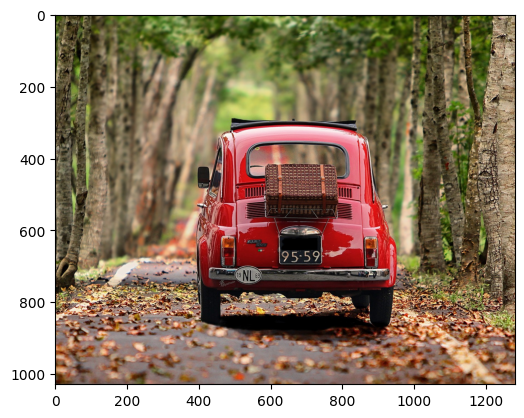

In [44]:
plt.imshow(image)
plt.show()

In [ ]:
transforms.Resize((512, 512))(image)

In [ ]:
transforms.RandomCrop(size=(512,512))(image)

In [ ]:
transforms.ColorJitter(brightness=1)(image)

In [ ]:
transforms.Grayscale()(image)

In [ ]:
transforms.Pad(padding=(20,10))(image)

In [ ]:
transforms.RandomAffine(degrees=90)(image)

In [ ]:
transforms.RandomHorizontalFlip(p=1.)(image)

In [ ]:
transform_list = [
	transforms.RandomAffine(degrees=90),
	transforms.Pad(padding=(20,20))
]

transforms.RandomApply(transform_list, p=0.5)(image)
# OR
transforms.RandomChoice(transforms=transform_list)(image)
# OR
transforms.Compose(transform_list)(image)

In [ ]:
cifar_dir = '/content/drive/MyDrive/zero-base DS/DL/_data/cifar/'
train_dir = os.path.join(cifar_dir, "train")
test_dir = os.path.join(cifar_dir, "test")

In [ ]:
train_transform = transforms.Compose([
	transforms.RandomResizedCrop(224),
	transforms.RandomHorizontalFlip(),
	transforms.ColorJitter(brightness=1, contrast=0, saturation=0, hue=0),
	transforms.Resize(224),
	transforms.ToTensor(),
	transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
	transforms.Resize(224),
	transforms.ToTensor(),
	transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
# class Dataset(torch.utils.data.Dataset):

train_dataset = Dataset(data_paths=glob(train_dir + "/*.png"), transform=transform)
test_dataset = Dataset(data_paths=glob(test_dir + "/*.png"), transform=test_transform)

In [ ]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size
)

## Î™®Îç∏ ÌïôÏäµ Î∞è Ï†ÄÏû•

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import datasets, transforms

### - model train

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    dataset=datasets.MNIST(root='dataset/', train=True, download=True,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(mean=(0.5,), std=(0.5,))
                           ])),
    batch_size=batch_size,
    shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=datasets.MNIST(root='dataset', train=False,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.,), (1.))
                           ])),
    batch_size=batch_size,
    shuffle=True)

In [ ]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(ResidualBlock, self).__init__()

        self.in_channel, self.out_channel = in_channel, out_channel

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=1, padding=0)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(out_channel, out_channel, kernel_size=1, padding=0)

        if in_channel != out_channel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channel, out_channel, kernel_size=1, padding=0)
            )
        else:
            self.shortcut = nn.Sequential()

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = F.relu(self.conv3(out))
        out = out + self.shortcut(x)
        return F.relu(out)

class ResNet(nn.Module):
    def __init__(self, color='gray'):
        super(ResNet, self).__init__()
        if color == "gray":
            self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        elif color == "rgb":
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

        self.resblock1 = ResidualBlock(32, 64)
        self.resblock2 = ResidualBlock(64, 64)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = self.resblock1(x)
        x = self.resblock2(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
model = ResNet().to(device)

In [ ]:
epochs = 10
optimizer = optim.SGD(model.parameters(), lr=0.003)
scheduler = ReduceLROnPlateau(optimizer, mode='min')
# LossÎ•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, mode='min' / AccuracyÎ•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, mode='max' Î°ú ÏÑ§Ï†ï
# epochÎ•º ÎèÑÎäî ÎèôÏïà loss Í∞íÏù¥ Î≥ÄÎèôÏù¥ ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎ©¥ schedulerÍ∞Ä learning_rateÎ•º ÏùºÏ†ï ÎπÑÏú®Î°ú Ï§ÑÏó¨ Ï§ÄÎã§.

def train_loop(dataloader, model, loss_fn, optimizer, scheduler, epoch):
    model.train()
    size = len(dataloader)
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 500 == 0:
            print(f"Epoch {epoch+1} : [{batch}/{size}] loss : {loss.item()}")

    scheduler.step(loss)

    return loss.item()

# ÌïôÏäµ
# F.nll_loss: Compute the "negative log likelihood" loss.
# Î™®Îç∏Ïùò Ï∂úÎ†•Ï∏µ ÌôúÏÑ±Ìï®ÏàòÏù∏ F.log_softmax()ÏôÄ Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ One-Hot Encoding Ìö®Í≥ºÎ•º Î≥º Ïàò ÏûàÎã§.
for epoch in range(epochs):
    loss = train_loop(train_loader, model, F.nll_loss, optimizer, scheduler, epoch)
    print(f"epoch:{epoch+1} --> loss:{loss}" )

Epoch 1 : [0/1875] loss : 2.285984992980957
Epoch 1 : [500/1875] loss : 2.314659595489502
Epoch 1 : [1000/1875] loss : 2.305518388748169
Epoch 1 : [1500/1875] loss : 2.3015615940093994
epoch:1 --> loss:2.3006670475006104
Epoch 2 : [0/1875] loss : 2.305032253265381
Epoch 2 : [500/1875] loss : 2.3018338680267334
Epoch 2 : [1000/1875] loss : 2.314079523086548
Epoch 2 : [1500/1875] loss : 2.301872730255127
epoch:2 --> loss:2.3003456592559814
Epoch 3 : [0/1875] loss : 2.3093950748443604
Epoch 3 : [500/1875] loss : 2.3125991821289062
Epoch 3 : [1000/1875] loss : 2.284093141555786
Epoch 3 : [1500/1875] loss : 2.289682149887085
epoch:3 --> loss:2.317432403564453
Epoch 4 : [0/1875] loss : 2.29801082611084
Epoch 4 : [500/1875] loss : 2.2909247875213623
Epoch 4 : [1000/1875] loss : 2.274104118347168
Epoch 4 : [1500/1875] loss : 2.3035976886749268
epoch:4 --> loss:2.302130699157715
Epoch 5 : [0/1875] loss : 2.2649011611938477
Epoch 5 : [500/1875] loss : 2.296720027923584
Epoch 5 : [1000/1875] loss

### - model save & load

In [ ]:
# model Ï†ÄÏû•
torch.save(model, 'model.pth')

# model Î°úÎìú
model = torch.load('model.pth')
model

ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resblock1): ResidualBlock(
    (conv1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential(
      (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (resblock2): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential()
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# weightsÎßå Ï†ÄÏû•
torch.save(model.state_dict(), 'model_weights.pth')

# model Íµ¨Ï°∞Î•º ÎßåÎì§Í∏∞
model = ResNet()

# Ï†ÄÏû•Îêú weightsÎ•º modelÏóê Î°úÎìúÌïòÍ∏∞
model.load_state_dict(torch.load('model_weights.pth'))
model

ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resblock1): ResidualBlock(
    (conv1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential(
      (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (resblock2): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential()
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

### - train resume save & load

- ÌïôÏäµ Ïù¥Î†•ÏùÑ Ï†ÄÏû•ÌïòÍ≥† Îã§Ïãú Î°úÎìúÌï¥ Ïù¥Ïñ¥ÏÑú ÌïôÏäµÏùÑ Ïû¨Í∞úÌï† Ïàò ÏûàÎã§.

In [ ]:
checkpoint_path = 'checkpoint.pth'

torch.save(obj={
    'epochs': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, f=checkpoint_path)

In [ ]:
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path) #--> dict type
checkpoint.keys()

dict_keys(['epochs', 'model_state_dict', 'optimizer_state_dict', 'loss'])

In [ ]:
epochs = checkpoint['epochs']
epochs

10

In [ ]:
model = ResNet().to(device)
model.load_state_dict(checkpoint['model_state_dict'])
model

ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resblock1): ResidualBlock(
    (conv1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential(
      (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (resblock2): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (shortcut): Sequential()
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
optimizer = optim.SGD(params=model.parameters(), lr=0.003)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.003
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
loss = checkpoint['loss']
loss

2.022549629211426

üëÜ ÏúÑ Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥† Ïù¥Ïñ¥ÏÑú Î™®Îç∏ÏùÑ ÌïôÏäµ ÏãúÌÇ¨ Ïàò ÏûàÎã§.